## 빅데이터 기반 AI 응용 솔루션 개발자 전문 과정

#### 교과목명 : 머신러닝 알고리즘 구현
- 평가일 : 03.26
- 성명 : 
- 점수 :

### 머신러닝
- 지도학습 : 회귀, 분류(특별한 경우가 아니라면 회귀와 분류는 알고리즘이 같습니다)
    - 평가지표
    - SVM, DecisionTree
    - Boosting - RandomForest, XGBoosting(LightGBM)
    - 교차검증
    - 하이퍼파라미터
    - 중요 피처(회귀 계수)추출

- 비지도학습 : 군집, 차원축소
    - 군집 : 개념, 알고리즘 , 최적의 군집의 수를 파악 방법
    - 차원축소 : SVD, PCA
- 추천 시스템 생성 : 실무에서 많이 사용(기업이 클수록 군집과 추천 시스템 많이 사용)


Q1. iris data를 불러와서 아래 사항을 수행하세요.(15점)
- 붓꽃의 종류를 분류하는 결정트리 알고리즘을 사용하여 모델링 및 정확도로 평가를 수행하세요(test_size = 0.2)
- Feature importance를 출력하시오

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings('ignore')

iris_data = load_iris()

X_train,X_test,y_train,y_test = train_test_split(iris_data.data, iris_data.target,
test_size=0.2, random_state=11)



In [ ]:
# 분류기 생성
dt_clf = DecisionTreeClassifier(min_samples_leaf= 4)
# 훈련
dt_clf.fit(X_train, y_train)
# 예측
pred = dt_clf.predict(X_test)

print('정확도 : ', accuracy_score(y_test, pred))
print('피처 중요도 : ', dt_clf.feature_importances_)

# 트리는 시각화까지 해보는게 중요 - 설명하기 가장 좋은 모델입니다.
# 트리의 시각화때문에 정확도가 다른 모델보다 떨어져도 결정트리를 사용하는 경우도 있습니다.

정확도 :  0.9333333333333333
피처 중요도 :  [0.00594727 0.         0.5459484  0.44810433]


Q2. 타이타닉 생존자 데이터를 가지고 아래와 같은 문제를 해결하시오.(15점)
- 설명 변수를 모두 정규화 하시오.
- 훈련 데이터 와 테스트 데이터를 7:3 으로 분할 하시오.
- 로지스틱 회귀를 적용해서 훈련을 수행하시오
- 테스트 데이터를 이용해서 결과를 확인해보고 Accuracy, Precision, Recall, F1 통계량을 계산해서 출력하시오.

In [ ]:
import numpy as np
import pandas as pd
import sklearn

import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
    
# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)  

# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)  

# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()   
rdf['embarked'].fillna(most_freq, inplace=True)

# 분석에 활용할 열(속성)을 선택 
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)

# 속성(변수) 선택
X=ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 'town_C', 'town_Q', 'town_S']]  #독립 변수 X
y=ndf['survived']                      #종속 변수 Y




테스트 모델의 분류 결과
[0 0 1 0 0]
실제 모델의 분류 결과
728    0
555    0
426    1
278    0
617    0
Name: survived, dtype: int64
accuracy: 0.81
Precision : 0.809
Recall : 0.809
F1 : 0.809


In [ ]:
import numpy as np
import pandas as pd
import sklearn

import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
    
# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)  

# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)  

# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()   
rdf['embarked'].fillna(most_freq, inplace=True)

# 분석에 활용할 열(속성)을 선택 
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)

# 속성(변수) 선택
X=ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 'town_C', 'town_Q', 'town_S']]  #독립 변수 X
y=ndf['survived']                      #종속 변수 Y

In [ ]:
# 설명 변수를 모두 정규화 하시오.
X = preprocessing.StandardScaler().fit(X).transform(X)
# 훈련 데이터 와 테스트 데이터를 7:3 으로 분할 하시오.
X_train,X_test,y_train,y_test =  train_test_split(X, y, test_size=0.3, random_state=42)

# 로지스틱 회귀를 적용해서 훈련을 수행하시오
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=42)
lr.fit(X_train, y_train)

print('테스트 모델의 결과 : ', lr.predict_proba(X_test[:5, :]).argmax(axis=1))
print('실행 모델의 결과 : ', y_test[:5])

y_test_pred = lr.predict(X_test)
# 테스트 데이터를 이용해서 결과를 확인해보고 Accuracy, Precision, Recall, F1 통계량을 계산해서 출력하시오.
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print('정확도 : ', accuracy_score(y_test, y_test_pred))
print('재현율 : ', recall_score(y_test, y_test_pred))
print('정밀도 : ', precision_score(y_test, y_test_pred))
print('f1_score : ', f1_score(y_test, y_test_pred))

테스트 모델의 결과 :  [0 0 1 1 0]
실행 모델의 결과 :  149    0
407    1
53     1
369    1
818    0
Name: survived, dtype: int64
정확도 :  0.7627906976744186
재현율 :  0.6629213483146067
정밀도 :  0.7375
f1_score :  0.698224852071006


Q3. 이전에 읽어온 타이타닉 데이터를 이용해서 아래 작업을 수행하시요(10점)
- SVM 모델을 이용해서 학습하세요
- kernel은 rbf를 적용하시오
- 테스트 데이터에서 10개의 실제 값과 예측 값을 출력하시오.

In [ ]:
# sklearn 라이브러리에서 SVM 분류 모형 가져오기
from sklearn import svm



[0 0 1 0 1 0 1 0 1 0]
[0 0 1 0 0 1 1 1 0 0]




In [ ]:
# sklearn 라이브러리에서 SVM 분류 모형 가져오기
from sklearn import svm

svm_model = svm.SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
y_hat = svm_model.predict(X_test)

print(y_hat[:10])
print(y_test.values[:10])

[0 1 1 1 0 1 0 1 0 1]
[0 1 1 1 0 1 1 1 0 0]


Q4. OverSampling 과 UnderSampling 에 대해서 기술하시오.(10점)

In [ ]:
OverSampling : 많은 데이터 세트를 적은 데이터 세트 수준으로 감소시키는 방식
UnderSampling : 적은 데이터 세트를 많은 데이터 세트 수준으로 증가시키는 방식. 단순한 증식은 Overfitting을 만들 가능성이 높으므로 증식을 할 때는 약간의 잡음을 섞어주어야 하며, 대표적인 방법으로 SMOTE가 있습니다.

Q5. 이전에 만든 타이타닉 데이터셋을 이용해서 아래 작업을 수행하시오.(10점)
- 랜덤 포레스트를 이용해서 학습하시오.
- n_estimators = 25로 하고 random_state = 1 로 설정하시오
- 모형의 성능 평가는 Confusion Matrix를 이용하시오.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 



[[106  19]
 [ 27  63]]




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
# n_jobs는 멀티 스레드의 개수를 설정
# 이 옵션이 있으면 각각의 수행을 독집적으로 합니다
# 복원 추출을 사용하므로 각각의 수행이 독립적
# gradientboosting의 훈련속도가 더 느림
rf_clf = RandomForestClassifier(criterion='entropy', n_estimators=25, random_state=1, n_jobs=-1)
rf_clf.fit(X_train, y_train)
y_hat = rf_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
tree_matrix = confusion_matrix(y_test, y_hat)
print(tree_matrix)


[[104  22]
 [ 26  63]]


Q6. Q5에서 cv=5를 적용하여 cross_val_score를 이용한 교차검증을 수행하여 5 folds의 평균 RSME를 구하세요.(10점)

In [ ]:
from sklearn.model_selection import cross_val_score



5 folds의 평균 RMSE : 0.485


In [ ]:
from sklearn.model_selection import cross_val_score
# 교차검증시에는 테스트데이터가 필요없습니다.
# 점수가 높으면 긍정평가를 하므로 rmse는 -1을 곱해주어야 합니다.
neg_mean_scores = cross_val_score(rf_clf, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

rmse_score = np.sqrt(-1 * neg_mean_scores)
print(rmse_score)
avg_rmse = np.mean(rmse_score)
print(avg_rmse)

[0.47958315 0.42426407 0.4        0.47958315 0.44946657]
0.44657938966999333


Q7. 이전의 타이타닉 데이터를 이용해서 GradientBootingd을 적용하고 정확도를 출력하시오.(10점)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier



GBM 정확도: 0.7953


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
print(accuracy_score(y_test, gb_pred))

0.8


Q8. 'dataset/credit_card.xls' 데이터셋을 불러와서 아래사항을 수행하세요.(10점)
- 전처리 : PAY_0 칼럼을 PAY_1으로 'default payment next month' 칼럼도 'default'로 칼럼명 변경. ID 삭제.
- heatmap을 이용하여 23개의 속성 데이터간 상관관계 탐색 
- 전체 23개 속성의 1/4 수준인 6개의 PCA 컴포넌트로 차원 축소를 수행

(30000, 6)


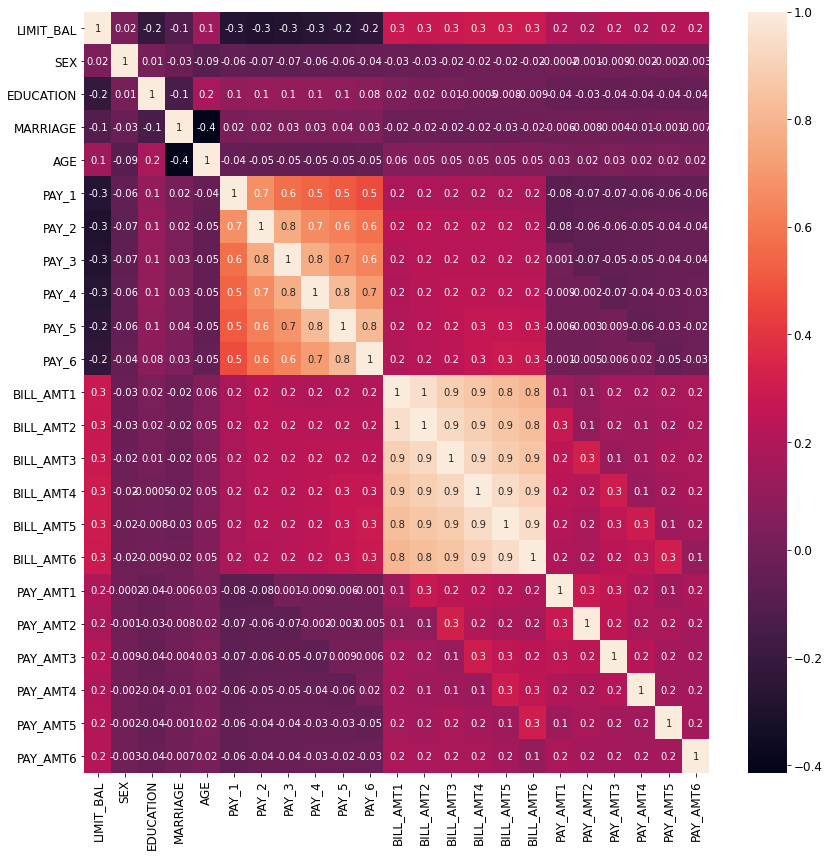

In [ ]:
Q8. 'dataset/credit_card.xls' 데이터셋을 불러와서 아래사항을 수행하세요.(10점)
- 전처리 : PAY_0 칼럼을 PAY_1으로 'default payment next month' 칼럼도 'default'로 칼럼명 변경. ID 삭제.
- heatmap을 이용하여 23개의 속성 데이터간 상관관계 탐색 
- 전체 23개 속성의 1/4 수준인 6개의 PCA 컴포넌트로 차원 축소를 수행

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/k-digital/00_test/0903_Algorithm/credit_card.xls',header=1)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


(30000, 6)


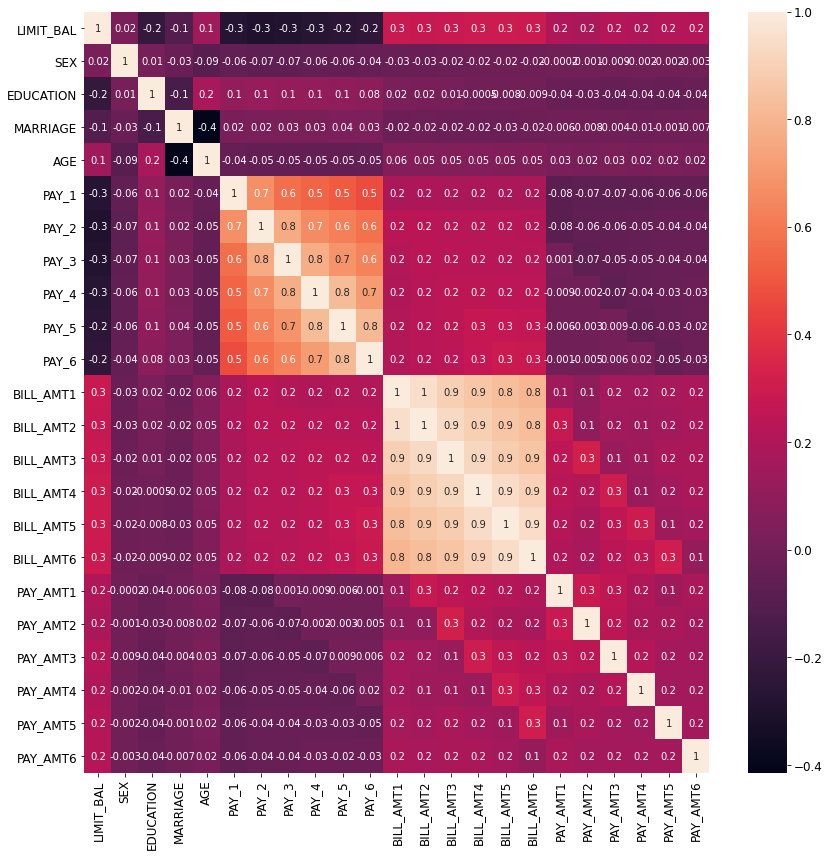

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/k-digital/00_test/0903_Algorithm/credit_card.xls',header=1)
df.rename(columns={'PAY_0':'PAY_1','default payment next month' : 'default'},
          inplace=True)
y_target = df['default']
X_features = df.drop(['default', 'ID'], axis=1)

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(X_features)
X_features_pca = pca.transform(X_features)
print(X_features_pca.shape)

Q9. load_iris를 불러와서 군집분석을 수행하세요(10점)
- 데이터플레임 생성
- KMeans를 이용하여 군집화한 후 cluster 컬럼 추가

In [ ]:
from sklearn.cluster import KMeans 


In [ ]:
from sklearn.cluster import KMeans
iris = load_iris()
df_iris = pd.DataFrame(data = iris.data, 
                       columns=['sepal_lenght', 'sepal_width',
                                'petal_lenght', 'petal_width'])
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,
                random_state=42).fit(df_iris)
df_iris['cluster'] = kmeans.labels_
print(df_iris.head(51))

    sepal_lenght  sepal_width  petal_lenght  petal_width  cluster
0            5.1          3.5           1.4          0.2        1
1            4.9          3.0           1.4          0.2        1
2            4.7          3.2           1.3          0.2        1
3            4.6          3.1           1.5          0.2        1
4            5.0          3.6           1.4          0.2        1
5            5.4          3.9           1.7          0.4        1
6            4.6          3.4           1.4          0.3        1
7            5.0          3.4           1.5          0.2        1
8            4.4          2.9           1.4          0.2        1
9            4.9          3.1           1.5          0.1        1
10           5.4          3.7           1.5          0.2        1
11           4.8          3.4           1.6          0.2        1
12           4.8          3.0           1.4          0.1        1
13           4.3          3.0           1.1          0.1        1
14        